In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df = pd.read_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/WELFake/WELFake_Dataset.csv')

df = df[['title', 'text', 'label']].drop_duplicates(subset=['title', 'text'], keep='first')  # Remove duplicates based on 'title' and 'text'
df.duplicated().sum()  # Check for duplicates

df.to_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/WELFake/Clean_WELFake.csv', index=False)

In [2]:
import nltk
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  #removes punctuation
    text = re.sub(r'\d+', '', text)  #removes numbers
    text = text.lower()  #turns everything to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words]) #gets rid of stop words
    return text

df['text'] = df['text'].fillna('').apply(clean_text)

df.to_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/WELFake/FullyClean_WELFake.csv', index=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/euansmith9/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df.value_counts('label')

label
0    34791
1    28887
Name: count, dtype: int64

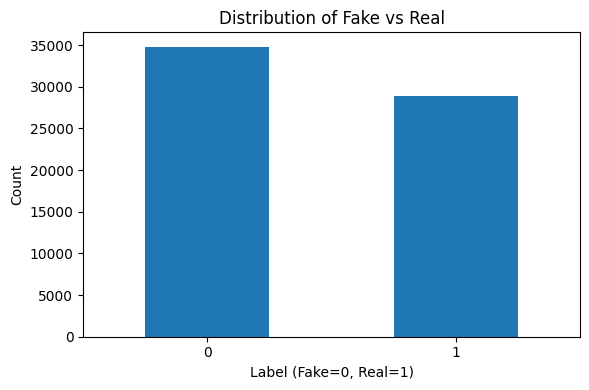

In [4]:
# Count the labels
label_counts = df['label'].value_counts()

# Plot as bar chart
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.xlabel('Label (Fake=0, Real=1)')
plt.ylabel('Count')
plt.title('Distribution of Fake vs Real')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [5]:
df.isnull().sum()

title    518
text       0
label      0
dtype: int64

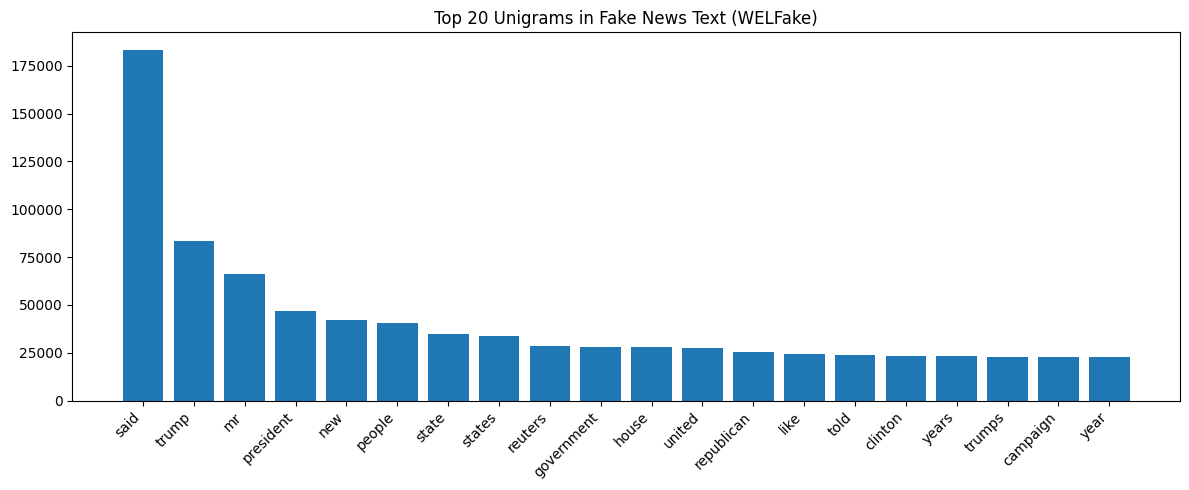

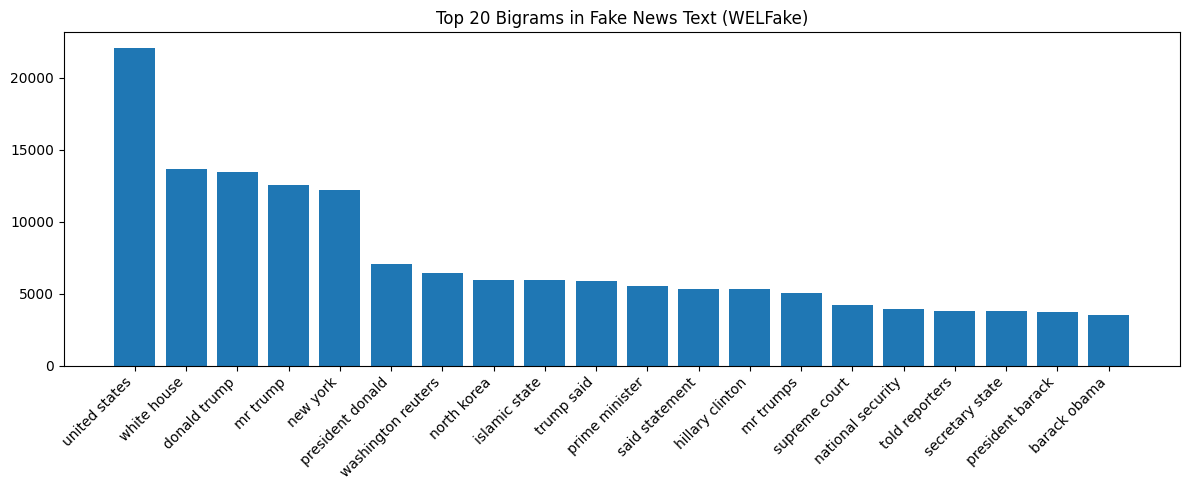

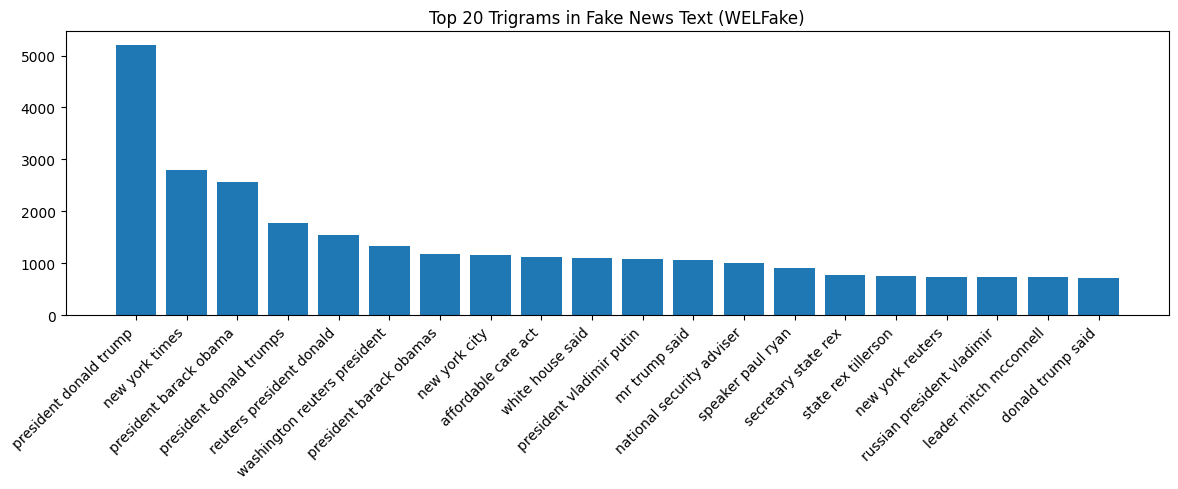

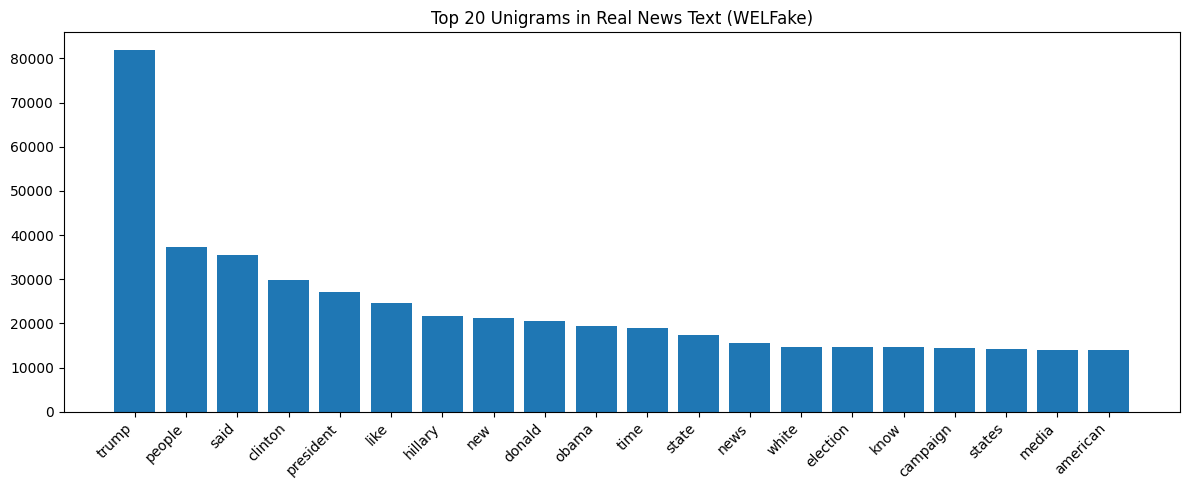

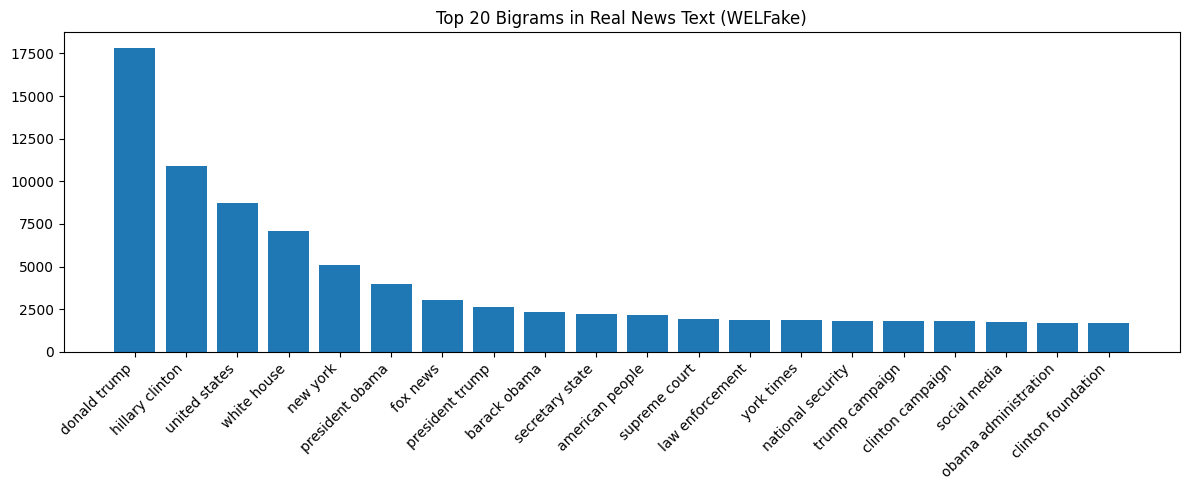

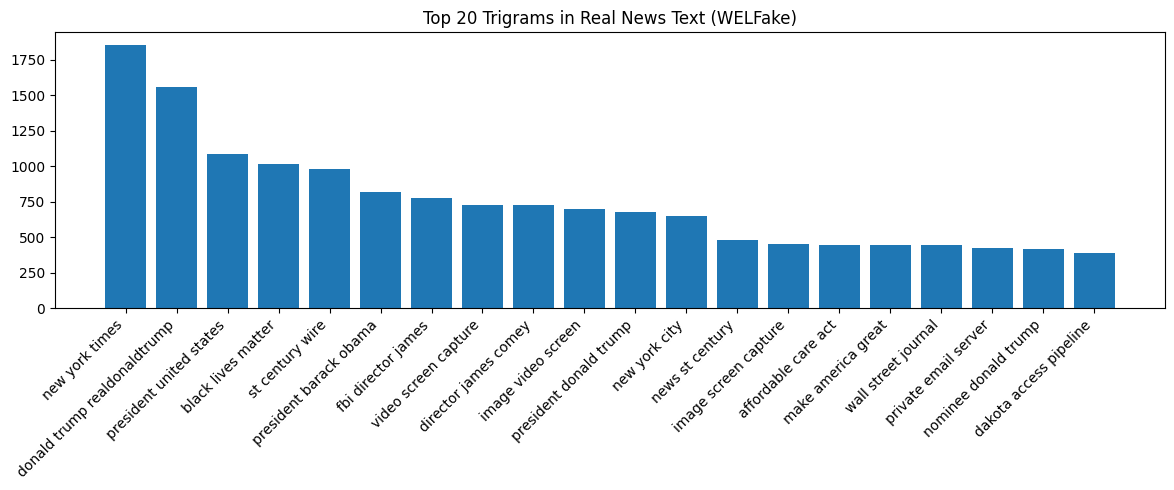

In [6]:
# Full code to extract and plot top 20 unigrams, bigrams, trigrams for fake and real news titles

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Function to extract top n-grams
def get_top_ngrams(corpus, ngram_range=(1, 1), n=20):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

# Function to plot bar charts
def plot_ngrams(ngrams, title):
    words = [x[0] for x in ngrams]
    counts = [x[1] for x in ngrams]
    plt.figure(figsize=(12, 5))
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Sample title data for fake and real news
fake_text = df[df['label'] == 0]['text'].dropna()
real_text = df[df['label'] == 1]['text'].dropna()

# Extract and plot for Fake News
plot_ngrams(get_top_ngrams(fake_text, (1, 1), 20), "Top 20 Unigrams in Fake News Text (WELFake)")
plot_ngrams(get_top_ngrams(fake_text, (2, 2), 20), "Top 20 Bigrams in Fake News Text (WELFake)")
plot_ngrams(get_top_ngrams(fake_text, (3, 3), 20), "Top 20 Trigrams in Fake News Text (WELFake)")

# Extract and plot for Real News
plot_ngrams(get_top_ngrams(real_text, (1, 1), 20), "Top 20 Unigrams in Real News Text (WELFake)")
plot_ngrams(get_top_ngrams(real_text, (2, 2), 20), "Top 20 Bigrams in Real News Text (WELFake)")
plot_ngrams(get_top_ngrams(real_text, (3, 3), 20), "Top 20 Trigrams in Real News Text (WELFake)")
